In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', 500)

data_path = '../Data/'
df = pd.read_csv(data_path + 'car-sales-extended-missing-data.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# Revisión de missings:

In [2]:
def missing_zero_values_table(df):

        zero_val = (df == 0.00).astype(int).sum(axis=0)

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)

        mz_table = mz_table.rename(

        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})

        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']

        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)

        mz_table['Data Type'] = df.dtypes

        mz_table = mz_table[

            mz_table.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      

            "There are " + str(mz_table.shape[0]) +

              " columns that have missing values.")

        return mz_table

In [3]:
def clean(x):
    
    if type(x) == str:
        if x =='Unknown': x = np.nan
        else: x = float(x.replace(',', '').replace(' ', ''))
    else: x = float(x)
    
    return(x)

In [4]:
missing_zero_values_table(df)

Your selected dataframe has 5 columns and 1000 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Colour,0,50,5.0,50,5.0,object
Odometer (KM),0,50,5.0,50,5.0,float64
Doors,0,50,5.0,50,5.0,float64
Price,0,50,5.0,50,5.0,float64
Make,0,49,4.9,49,4.9,object


In [5]:
df.head(1)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0


# Práctica:

* 1. Imputar con la moda la variable de color y llamarla color_mode.
* 2. Imputar la variable Doors utilizando el valor 4 y llamarla doors_four. 
* 3. Imputar el valor de precio y de odometer utilizando KNN a partir de las variables colour y doors y llamarlas price_knn and odometer_knn.
* 4. Imputar el valor del precio y de odometer utilizando una regresión estocástica, y llamarlas price_re and odometer_re.
* 5. Crear una regresión logística, para imputar la variable Make, utilizando las variables 4 variables creadas en los puntos 1, 2 y 3.
* 6. Crear una regresión logística, para imputar la variable Make, utilizando las 4 variables creadas en los puntos 1, 2 y 4.

# 1.- Imputa con la moda la variable de color y llamarla color_mode

In [6]:
from sklearn.impute import SimpleImputer
df["Colour"].head(10)

0    White
1     Blue
2    White
3    White
4     Blue
5      Red
6     Blue
7    White
8    White
9     Blue
Name: Colour, dtype: object

In [7]:
df["Colour"].value_counts(dropna=False)

White    390
Blue     302
Black     95
Red       88
Green     75
NaN       50
Name: Colour, dtype: int64

In [8]:
"""Vamos a usar el formato de moda para llenar los nan"""
import numpy as np

columna = ["Colour"]

#Iniciamos la clase

impmode= SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [9]:
aux1=df.copy()
aux1["color_mode"]=impmode.fit_transform(np.array(aux1[columna[0]]).reshape(-1,1))
aux1.loc[aux1["Colour"].isnull()]

,Make,Colour,Odometer (KM),Doors,Price,color_mode
20,Toyota,NaN,124844.0,4.0,24130.0,White
21,Honda,NaN,30615.0,4.0,29653.0,White
58,Toyota,NaN,97375.0,4.0,11479.0,White
71,Toyota,NaN,204213.0,4.0,6860.0,White
87,Honda,NaN,108415.0,4.0,20936.0,White
99,Honda,NaN,48069.0,4.0,12196.0,White
102,Honda,NaN,150582.0,NaN,7404.0,White
106,Toyota,NaN,218803.0,4.0,13283.0,White
121,Nissan,NaN,206073.0,NaN,3944.0,White
130,Nissan,NaN,18994.0,4.0,7813.0,White


# 2.- Imputar la variable doors y llamarla doors_four

In [10]:
aux1.head(5)

,Make,Colour,Odometer (KM),Doors,Price,color_mode
0,Honda,White,35431.0,4.0,15323.0,White
1,BMW,Blue,192714.0,5.0,19943.0,Blue
2,Honda,White,84714.0,4.0,28343.0,White
3,Toyota,White,154365.0,4.0,13434.0,White
4,Nissan,Blue,181577.0,3.0,14043.0,Blue


In [11]:
aux1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
 5   color_mode     1000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [12]:
aux1["Doors"].value_counts(dropna=False)

4.0    811
5.0     75
3.0     64
NaN     50
Name: Doors, dtype: int64

In [13]:
impvalue= SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=4.0)
aux1["doors_four"]=impvalue.fit_transform(np.array(aux1["Doors"].map(lambda x:clean(x))).reshape(-1,1))

In [14]:
aux1.head(5)

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four
0,Honda,White,35431.0,4.0,15323.0,White,4.0
1,BMW,Blue,192714.0,5.0,19943.0,Blue,5.0
2,Honda,White,84714.0,4.0,28343.0,White,4.0
3,Toyota,White,154365.0,4.0,13434.0,White,4.0
4,Nissan,Blue,181577.0,3.0,14043.0,Blue,3.0


In [15]:
aux1.loc[aux1["Doors"].isnull()].head(5)

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four
31,Toyota,White,108569.0,NaN,6866.0,White,4.0
47,Toyota,Blue,243969.0,NaN,16138.0,Blue,4.0
51,Honda,White,161068.0,NaN,13698.0,White,4.0
75,Toyota,Blue,156478.0,NaN,20424.0,Blue,4.0
88,Nissan,Red,61892.0,NaN,18160.0,Red,4.0


# 3.- Imputar el valor de precio y de odometer utilizando KNN a partir de las variables colour y doors y llamarlas price_knn and odometer_knn.

In [16]:
from sklearn.impute import KNNImputer
columnas =["Colour","Doors","Price","Odometer (KM)"]
df.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [17]:
aux2=df[columnas].copy()
aux2["Price"]=aux2["Price"].apply(lambda x:clean(x))
aux2["Odometer (KM)"]=aux2["Odometer (KM)"].apply(lambda x:clean(x))
aux2["Doors"]=aux2["Doors"].apply(lambda x:clean(x))
aux2.head(5)

,Colour,Doors,Price,Odometer (KM)
0,White,4.0,15323.0,35431.0
1,Blue,5.0,19943.0,192714.0
2,White,4.0,28343.0,84714.0
3,White,4.0,13434.0,154365.0
4,Blue,3.0,14043.0,181577.0


In [18]:
aux2["Colour"].value_counts(dropna=False)

White    390
Blue     302
Black     95
Red       88
Green     75
NaN       50
Name: Colour, dtype: int64

In [19]:
dic_color = {"White":1.0,"Blue":2.0,"Black":3.0,"Red":4.0,"Green":5.0}
aux2["Colour_cat"]=aux2["Colour"].map(dic_color)

In [20]:
aux2["Colour_cat"].value_counts(dropna=False)

1.0    390
2.0    302
3.0     95
4.0     88
5.0     75
NaN     50
Name: Colour_cat, dtype: int64

In [21]:
aux3=aux2[["Colour_cat"]+columnas[1:4]].copy()
aux3.head(3)

,Colour_cat,Doors,Price,Odometer (KM)
0,1.0,4.0,15323.0,35431.0
1,2.0,5.0,19943.0,192714.0
2,1.0,4.0,28343.0,84714.0


In [22]:
aux3.dtypes

Colour_cat       float64
Doors            float64
Price            float64
Odometer (KM)    float64
dtype: object

In [23]:
kimp = KNNImputer(add_indicator=True)
columns = [c+'_imp' for c in aux3.columns]+[c+'_ind' for c in aux3.columns]
knn=pd.DataFrame(kimp.fit_transform(np.array(aux3)),columns=columns)

In [24]:
knn.head(10)

,Colour_cat_imp,Doors_imp,Price_imp,Odometer (KM)_imp,Colour_cat_ind,Doors_ind,Price_ind,Odometer (KM)_ind
0,1.0,4.0,15323.0,35431.0,0.0,0.0,0.0,0.0
1,2.0,5.0,19943.0,192714.0,0.0,0.0,0.0,0.0
2,1.0,4.0,28343.0,84714.0,0.0,0.0,0.0,0.0
3,1.0,4.0,13434.0,154365.0,0.0,0.0,0.0,0.0
4,2.0,3.0,14043.0,181577.0,0.0,0.0,0.0,0.0
5,4.0,4.0,23883.0,42652.0,0.0,0.0,0.0,0.0
6,2.0,4.0,8473.0,163453.0,0.0,0.0,0.0,0.0
7,1.0,4.0,20306.0,135190.6,0.0,0.0,0.0,1.0
8,1.0,4.0,9374.0,130538.0,0.0,0.0,0.0,0.0
9,2.0,4.0,26683.0,51029.0,0.0,0.0,0.0,0.0


In [25]:
entregable = df.copy()
entregable["color_mode"]=aux1["color_mode"]
entregable["doors_four"]=aux1["doors_four"]
entregable["price_knn"]=knn["Price_imp"]
entregable["odometer_knn"]=knn["Odometer (KM)_imp"]
entregable.head(10)

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four,price_knn,odometer_knn
0,Honda,White,35431.0,4.0,15323.0,White,4.0,15323.0,35431.0
1,BMW,Blue,192714.0,5.0,19943.0,Blue,5.0,19943.0,192714.0
2,Honda,White,84714.0,4.0,28343.0,White,4.0,28343.0,84714.0
3,Toyota,White,154365.0,4.0,13434.0,White,4.0,13434.0,154365.0
4,Nissan,Blue,181577.0,3.0,14043.0,Blue,3.0,14043.0,181577.0
5,Honda,Red,42652.0,4.0,23883.0,Red,4.0,23883.0,42652.0
6,Toyota,Blue,163453.0,4.0,8473.0,Blue,4.0,8473.0,163453.0
7,Honda,White,NaN,4.0,20306.0,White,4.0,20306.0,135190.6
8,NaN,White,130538.0,4.0,9374.0,White,4.0,9374.0,130538.0
9,Honda,Blue,51029.0,4.0,26683.0,Blue,4.0,26683.0,51029.0


In [26]:
entregable["price_knn"].isnull().any()

False

In [27]:
entregable["odometer_knn"].isnull().any()

False

# 4.- Imputar el valor del precio y de odometer utilizando una regresión estocástica, y llamarlas price_re and odometer_re.

In [28]:
aux3.head(5)

,Colour_cat,Doors,Price,Odometer (KM)
0,1.0,4.0,15323.0,35431.0
1,2.0,5.0,19943.0,192714.0
2,1.0,4.0,28343.0,84714.0
3,1.0,4.0,13434.0,154365.0
4,2.0,3.0,14043.0,181577.0


In [29]:
aux4 = aux3.copy()
pred = ["Colour_cat","Doors"]
objetivo = ["Price", "Odometer (KM)"]

In [30]:
#Limpieza
aux4["Colour_cat"]=aux4["Colour_cat"].map(lambda x:clean(x))

In [31]:
missing_zero_values_table(aux4)

Your selected dataframe has 4 columns and 1000 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Colour_cat,0,50,5.0,50,5.0,float64
Doors,0,50,5.0,50,5.0,float64
Price,0,50,5.0,50,5.0,float64
Odometer (KM),0,50,5.0,50,5.0,float64


In [32]:
knn.head(5)

,Colour_cat_imp,Doors_imp,Price_imp,Odometer (KM)_imp,Colour_cat_ind,Doors_ind,Price_ind,Odometer (KM)_ind
0,1.0,4.0,15323.0,35431.0,0.0,0.0,0.0,0.0
1,2.0,5.0,19943.0,192714.0,0.0,0.0,0.0,0.0
2,1.0,4.0,28343.0,84714.0,0.0,0.0,0.0,0.0
3,1.0,4.0,13434.0,154365.0,0.0,0.0,0.0,0.0
4,2.0,3.0,14043.0,181577.0,0.0,0.0,0.0,0.0


In [33]:
knn.shape[0]

1000

In [34]:
#Usamos las variables predictoras ya imputadas por las KNN
aux4 = aux4.merge(knn, left_index=True,right_index=True,how="inner")
aux4.head(5)

,Colour_cat,Doors,Price,Odometer (KM),Colour_cat_imp,Doors_imp,Price_imp,Odometer (KM)_imp,Colour_cat_ind,Doors_ind,Price_ind,Odometer (KM)_ind
0,1.0,4.0,15323.0,35431.0,1.0,4.0,15323.0,35431.0,0.0,0.0,0.0,0.0
1,2.0,5.0,19943.0,192714.0,2.0,5.0,19943.0,192714.0,0.0,0.0,0.0,0.0
2,1.0,4.0,28343.0,84714.0,1.0,4.0,28343.0,84714.0,0.0,0.0,0.0,0.0
3,1.0,4.0,13434.0,154365.0,1.0,4.0,13434.0,154365.0,0.0,0.0,0.0,0.0
4,2.0,3.0,14043.0,181577.0,2.0,3.0,14043.0,181577.0,0.0,0.0,0.0,0.0


In [35]:
aux4.shape[0]

1000

In [36]:
aux4.columns

Index(['Colour_cat', 'Doors', 'Price', 'Odometer (KM)', 'Colour_cat_imp',
       'Doors_imp', 'Price_imp', 'Odometer (KM)_imp', 'Colour_cat_ind',
       'Doors_ind', 'Price_ind', 'Odometer (KM)_ind'],
      dtype='object')

In [37]:
aux4.rename(columns={'Colour_cat_imp_x':"Colour_cat_imp",
       'Doors_imp_x':'Doors_imp', 'Price_imp_x':'Price_imp', 'Odometer (KM)_imp_x':'Odometer (KM)_imp', 
        'Colour_cat_ind_x':'Colour_cat_ind','Doors_ind_x':'Doors_ind', 'Price_ind_x':'Price_ind',
        'Odometer (KM)_ind_x':'Odometer (KM)_ind'},inplace=True)
aux4.columns

Index(['Colour_cat', 'Doors', 'Price', 'Odometer (KM)', 'Colour_cat_imp',
       'Doors_imp', 'Price_imp', 'Odometer (KM)_imp', 'Colour_cat_ind',
       'Doors_ind', 'Price_ind', 'Odometer (KM)_ind'],
      dtype='object')

In [38]:
col_reg = list(aux4.columns[:12])
aux4 = aux4[col_reg]

In [39]:
aux4.head(5)

,Colour_cat,Doors,Price,Odometer (KM),Colour_cat_imp,Doors_imp,Price_imp,Odometer (KM)_imp,Colour_cat_ind,Doors_ind,Price_ind,Odometer (KM)_ind
0,1.0,4.0,15323.0,35431.0,1.0,4.0,15323.0,35431.0,0.0,0.0,0.0,0.0
1,2.0,5.0,19943.0,192714.0,2.0,5.0,19943.0,192714.0,0.0,0.0,0.0,0.0
2,1.0,4.0,28343.0,84714.0,1.0,4.0,28343.0,84714.0,0.0,0.0,0.0,0.0
3,1.0,4.0,13434.0,154365.0,1.0,4.0,13434.0,154365.0,0.0,0.0,0.0,0.0
4,2.0,3.0,14043.0,181577.0,2.0,3.0,14043.0,181577.0,0.0,0.0,0.0,0.0


In [40]:
aux4.isnull().any()

Colour_cat            True
Doors                 True
Price                 True
Odometer (KM)         True
Colour_cat_imp       False
Doors_imp            False
Price_imp            False
Odometer (KM)_imp    False
Colour_cat_ind       False
Doors_ind            False
Price_ind            False
Odometer (KM)_ind    False
dtype: bool

In [41]:
train = aux4[['Colour_cat_imp', 'Doors_imp','Colour_cat_ind','Doors_ind', 'Price','Odometer (KM)']].loc[(aux4['Price'].isna() == False)&(aux4['Odometer (KM)'].isna() == False)].copy()
prediction = aux4[['Colour_cat_imp', 'Doors_imp','Colour_cat_ind','Doors_ind', 'Price','Odometer (KM)']].loc[(aux4['Price'].isna() == True)|(aux4['Odometer (KM)'].isna() == True)].copy()

In [42]:
train.isnull().any()

Colour_cat_imp    False
Doors_imp         False
Colour_cat_ind    False
Doors_ind         False
Price             False
Odometer (KM)     False
dtype: bool

In [43]:
prediction.isnull().any()

Colour_cat_imp    False
Doors_imp         False
Colour_cat_ind    False
Doors_ind         False
Price              True
Odometer (KM)      True
dtype: bool

In [44]:
from sklearn.linear_model import LinearRegression
#train.reset_index(drop = True, inplace = True)
#prediction.reset_index(drop = True, inplace = True)

In [45]:
# Regresión Lineal
pred = ['Colour_cat_imp', 'Doors_imp', 'Colour_cat_ind', 'Doors_ind']
X = train[pred]
y = train[objetivo[0]]
lr_price = LinearRegression()
lr_price.fit(X, y)

LinearRegression()

In [46]:
prediction['price_lr']= lr_price.predict(prediction[pred])

In [47]:
pred = ['Colour_cat_imp', 'Doors_imp', 'Colour_cat_ind', 'Doors_ind']
X = train[pred]
y = train[objetivo[1]]
lr_odometer = LinearRegression()
lr_odometer.fit(X, y)

LinearRegression()

In [48]:
prediction['odometer_lr']= lr_odometer.predict(prediction[pred])

In [49]:
prediction.head(5)

,Colour_cat_imp,Doors_imp,Colour_cat_ind,Doors_ind,Price,Odometer (KM),price_lr,odometer_lr
7,1.0,4.0,0.0,0.0,20306.0,NaN,16489.566616,127393.893735
37,1.0,4.0,0.0,0.0,15131.0,NaN,16489.566616,127393.893735
72,1.0,4.0,0.0,0.0,5648.0,NaN,16489.566616,127393.893735
86,2.0,4.0,0.0,0.0,3300.0,NaN,16115.456202,130119.493394
119,1.0,5.0,0.0,0.0,NaN,18394.0,22000.124508,123800.418604


In [50]:
prediction['price_lr'].describe(percentiles = [i/10 for i in range(10)])

count       98.000000
mean     16114.464163
std       1987.500909
min      10604.898310
0%       10604.898310
10%      14816.974656
20%      15167.269367
30%      15741.345788
40%      16115.456202
50%      16115.456202
60%      16489.566616
70%      16489.566616
80%      16489.566616
90%      16489.566616
max      22000.124508
Name: price_lr, dtype: float64

In [51]:
prediction['odometer_lr'].describe(percentiles = [i/10 for i in range(10)])

count        98.000000
mean     130540.046161
std        5943.996919
min      118256.794227
0%       118256.794227
10%      127133.531093
20%      127393.893735
30%      127393.893735
40%      127393.893735
50%      130119.493394
60%      130119.493394
70%      131977.217580
80%      134827.603037
90%      138296.292370
max      156988.573586
Name: odometer_lr, dtype: float64

In [52]:
df.shape[0]

1000

In [53]:
prediction.shape[0]

98

In [54]:
import matplotlib.pyplot as plt
np.histogram(y.values - lr_price.predict(X))

(array([ 82,  92,  94,  86,  96,  91,  85, 108,  90,  78]),
 array([ -6272.56661611,  17939.28917306,  42151.14496223,  66363.0007514 ,
         90574.85654058, 114786.71232975, 138998.56811892, 163210.42390809,
        187422.27969727, 211634.13548644, 235845.99127561]))

(array([ 82.,  92.,  94.,  86.,  96.,  91.,  85., 108.,  90.,  78.]),
 array([ -6272.56661611,  17939.28917306,  42151.14496223,  66363.0007514 ,
         90574.85654058, 114786.71232975, 138998.56811892, 163210.42390809,
        187422.27969727, 211634.13548644, 235845.99127561]),
 <BarContainer object of 10 artists>)

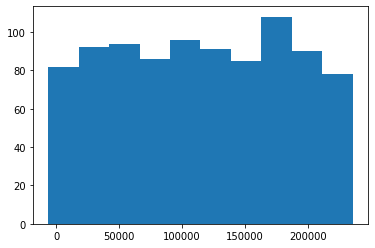

In [55]:
plt.hist(y.values - lr_price.predict(X), bins = 10)

In [56]:
np.histogram(y.values - lr_odometer.predict(X))

(array([ 63, 107,  89,  91,  93, 101,  79, 106,  95,  78]),
 array([-125389.56818341, -100708.50073855,  -76027.43329369,
         -51346.36584884,  -26665.29840398,   -1984.23095912,
          22696.83648573,   47377.90393059,   72058.97137545,
          96740.0388203 ,  121421.10626516]))

(array([ 63., 107.,  89.,  91.,  93., 101.,  79., 106.,  95.,  78.]),
 array([-125389.56818341, -100708.50073855,  -76027.43329369,
         -51346.36584884,  -26665.29840398,   -1984.23095912,
          22696.83648573,   47377.90393059,   72058.97137545,
          96740.0388203 ,  121421.10626516]),
 <BarContainer object of 10 artists>)

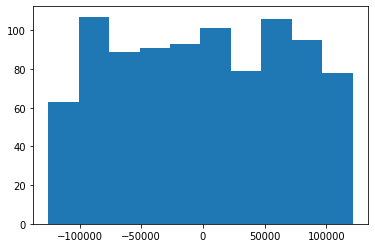

In [57]:
plt.hist(y.values - lr_odometer.predict(X), bins = 10)

In [58]:
# Cálculo de los residuales
residuals_price = y.values - lr_price.predict(X)
residuals_odometer = y.values - lr_odometer.predict(X)
# Cálculo de la varianza
variance_price = residuals_price.var()
variance_odometer=residuals_odometer.var()
print("Varianza de los residuales de precio: "+str(variance_price))
print("Varianza de los residuales de odometer: "+str(variance_odometer))

# Cálculo de la media
mean_price = residuals_price.mean()
mean_odometer=residuals_odometer.mean()
print("Media de los residuales de precio: " + str(mean_price))
print("Media de los resuduales de odometer: "+str(mean_odometer))

# Generación de los errores. 
rnoise_price = np.random.normal(mean_price, np.sqrt(variance_price), len(prediction))
rnoise_odometer = np.random.normal(mean_odometer,np.sqrt(variance_odometer),len(prediction))

# Regresión estocástica.
prediction['price_re'] = (prediction['price_lr']
                                      + rnoise_price)
prediction['odometer_re']=(prediction['odometer_lr']
                                      + rnoise_odometer)


Varianza de los residuales de precio: 4732465549.985289
Varianza de los residuales de odometer: 4674438762.149859
Media de los residuales de precio: 115033.92350332595
Media de los resuduales de odometer: 1.0841338174570426e-11


In [59]:
prediction.head(5)

,Colour_cat_imp,Doors_imp,Colour_cat_ind,Doors_ind,Price,Odometer (KM),price_lr,odometer_lr,price_re,odometer_re
7,1.0,4.0,0.0,0.0,20306.0,NaN,16489.566616,127393.893735,121014.273159,120525.850500
37,1.0,4.0,0.0,0.0,15131.0,NaN,16489.566616,127393.893735,106702.795322,173970.811395
72,1.0,4.0,0.0,0.0,5648.0,NaN,16489.566616,127393.893735,70518.515923,190206.213657
86,2.0,4.0,0.0,0.0,3300.0,NaN,16115.456202,130119.493394,208177.847856,159920.527925
119,1.0,5.0,0.0,0.0,NaN,18394.0,22000.124508,123800.418604,152167.393021,28422.450587


In [60]:
re=pd.concat([train,prediction])
re.head(5)

,Colour_cat_imp,Doors_imp,Colour_cat_ind,Doors_ind,Price,Odometer (KM),price_lr,odometer_lr,price_re,odometer_re
0,1.0,4.0,0.0,0.0,15323.0,35431.0,NaN,NaN,NaN,NaN
1,2.0,5.0,0.0,0.0,19943.0,192714.0,NaN,NaN,NaN,NaN
2,1.0,4.0,0.0,0.0,28343.0,84714.0,NaN,NaN,NaN,NaN
3,1.0,4.0,0.0,0.0,13434.0,154365.0,NaN,NaN,NaN,NaN
4,2.0,3.0,0.0,0.0,14043.0,181577.0,NaN,NaN,NaN,NaN


In [61]:
re=re.sort_index()

In [62]:
re.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=1000)

In [63]:
for a in list(re.loc[re["price_re"].isnull()].index):
    re["price_re"][a]=re["Price"][a]
    re["odometer_re"][a]=re["Odometer (KM)"][a]

In [64]:
re

,Colour_cat_imp,Doors_imp,Colour_cat_ind,Doors_ind,Price,Odometer (KM),price_lr,odometer_lr,price_re,odometer_re
0,1.0,4.0,0.0,0.0,15323.0,35431.0,NaN,NaN,15323.0,35431.0
1,2.0,5.0,0.0,0.0,19943.0,192714.0,NaN,NaN,19943.0,192714.0
2,1.0,4.0,0.0,0.0,28343.0,84714.0,NaN,NaN,28343.0,84714.0
3,1.0,4.0,0.0,0.0,13434.0,154365.0,NaN,NaN,13434.0,154365.0
4,2.0,3.0,0.0,0.0,14043.0,181577.0,NaN,NaN,14043.0,181577.0
...,...,...,...,...,...,...,...,...,...,...
995,3.0,4.0,0.0,0.0,32042.0,35820.0,NaN,NaN,32042.0,35820.0
996,1.0,3.0,0.0,0.0,5716.0,155144.0,NaN,NaN,5716.0,155144.0
997,2.0,4.0,0.0,0.0,31570.0,66604.0,NaN,NaN,31570.0,66604.0
998,1.0,4.0,0.0,0.0,4001.0,215883.0,NaN,NaN,4001.0,215883.0


In [66]:
re.loc[re["Price"].isnull()]

,Colour_cat_imp,Doors_imp,Colour_cat_ind,Doors_ind,Price,Odometer (KM),price_lr,odometer_lr,price_re,odometer_re
119,1.0,5.0,0.0,0.0,NaN,18394.0,22000.124508,123800.418604,152167.393021,28422.450587
152,1.0,4.0,0.0,0.0,NaN,66538.0,16489.566616,127393.893735,46683.305463,60803.757665
171,1.0,4.0,0.0,0.0,NaN,97036.0,16489.566616,127393.893735,182956.187253,218459.182934
176,2.0,4.0,0.0,0.0,NaN,94916.0,16115.456202,130119.493394,126283.516529,109291.988318
249,4.0,5.0,0.0,0.0,NaN,33911.0,20877.793265,131977.217580,191685.580839,144438.157828
256,2.0,4.0,0.0,0.0,NaN,65719.0,16115.456202,130119.493394,79674.357408,14353.620670
258,4.0,4.0,0.0,0.0,NaN,157169.0,15367.235374,135570.692711,112294.723576,137018.460596
316,1.0,4.0,0.0,0.0,NaN,NaN,16489.566616,127393.893735,82460.711638,129076.305679
335,3.0,4.0,0.0,0.0,NaN,188514.0,15741.345788,132845.093052,126001.982352,81933.885486
337,3.0,4.0,0.0,0.0,NaN,175075.0,15741.345788,132845.093052,124317.666012,187702.539942


In [116]:
from scipy.stats import ks_2samp
rl1 = re['Price']
rl2=re["price_re"]
ks_2samp(rl1, rl2)

KstestResult(statistic=0.05, pvalue=0.16411447756429137)

In [118]:
odo1 = re["Odometer (KM)"]
odo2 = re["odometer_re"]
ks_2samp(odo1,odo2)

KstestResult(statistic=0.05, pvalue=0.16411447756429137)

In [ ]:
"""Falta unirlo a entregable"""

# 5.- Crear una regresión logística, para imputar la variable Make, utilizando las variables 4 variables creadas en los puntos 1, 2 y 3.

In [67]:
df["Make"].value_counts(dropna=False)

Toyota    379
Honda     292
Nissan    183
BMW        97
NaN        49
Name: Make, dtype: int64

In [68]:
entregable.head(2)

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four,price_knn,odometer_knn
0,Honda,White,35431.0,4.0,15323.0,White,4.0,15323.0,35431.0
1,BMW,Blue,192714.0,5.0,19943.0,Blue,5.0,19943.0,192714.0


In [73]:
aux5 = entregable[["Make","color_mode","doors_four","price_knn","odometer_knn"]].copy()
dic_make = {"Toyota":1,"Honda":2,"Nissan":3,"BMW":4}
aux5["Make_cat"] = aux5["Make"].map(dic_make)
aux5 = aux5.drop(["Make"],axis=1)

In [74]:
aux5["color_mode"].value_counts(dropna=False)

White    440
Blue     302
Black     95
Red       88
Green     75
Name: color_mode, dtype: int64

In [75]:
dic_color = {"White":1.0,"Blue":2.0,"Black":3.0,"Red":4.0,"Green":5.0}
aux5["color_mode_cat"]=aux5["color_mode"].map(dic_color)

In [76]:
aux5=aux5.drop(["color_mode"],axis=1)

In [78]:
aux5.head(3)

,doors_four,price_knn,odometer_knn,Make_cat,color_mode_cat
0,4.0,15323.0,35431.0,2.0,1.0
1,5.0,19943.0,192714.0,4.0,2.0
2,4.0,28343.0,84714.0,2.0,1.0


In [79]:
aux5["color_mode_cat"].value_counts()

1.0    440
2.0    302
3.0     95
4.0     88
5.0     75
Name: color_mode_cat, dtype: int64

In [80]:
pred = ["color_mode_cat","doors_four","price_knn","odometer_knn"]
objetivo = ["Make_cat"]

In [82]:
aux5[objetivo].isnull().any()

Make_cat    True
dtype: bool

In [84]:
aux5[pred].isnull().any()

color_mode_cat    False
doors_four        False
price_knn         False
odometer_knn      False
dtype: bool

In [86]:
train = aux5[pred+objetivo].loc[aux5[objetivo[0]].isna() == False].copy()
prediction = aux5[pred+objetivo].loc[aux5[objetivo[0]].isna() == True].copy()

In [87]:
train

,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat
0,1.0,4.0,15323.0,35431.0,2.0
1,2.0,5.0,19943.0,192714.0,4.0
2,1.0,4.0,28343.0,84714.0,2.0
3,1.0,4.0,13434.0,154365.0,1.0
4,2.0,3.0,14043.0,181577.0,3.0
...,...,...,...,...,...
994,2.0,3.0,31666.0,163322.0,4.0
995,3.0,4.0,32042.0,35820.0,1.0
997,2.0,4.0,31570.0,66604.0,3.0
998,1.0,4.0,4001.0,215883.0,2.0


In [88]:
prediction

,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat
8,1.0,4.0,9374.0,130538.0,NaN
13,1.0,4.0,11121.0,134181.0,NaN
40,1.0,4.0,9229.0,177894.0,NaN
54,1.0,4.0,9918.0,109384.0,NaN
73,4.0,4.0,12001.0,227262.0,NaN
77,1.0,4.0,18484.0,126669.0,NaN
89,2.0,4.0,35988.0,90249.0,NaN
122,2.0,4.0,19000.0,174008.0,NaN
123,1.0,4.0,7994.0,138274.0,NaN
125,2.0,4.0,11648.0,83784.0,NaN


In [90]:
from sklearn.linear_model import LogisticRegression

In [94]:
# Regresión Logistica
X = train[pred]
y = train[objetivo]
lr = LogisticRegression()
lr.fit(X, y)

/Users/jesusarredondo/Documents/Diplomado/Modulo1/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [97]:
prediction['make_logreg1'] = lr.predict(prediction[pred])

In [98]:
prediction.head(5)

,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat,make_logreg1
8,1.0,4.0,9374.0,130538.0,NaN,1.0
13,1.0,4.0,11121.0,134181.0,NaN,1.0
40,1.0,4.0,9229.0,177894.0,NaN,1.0
54,1.0,4.0,9918.0,109384.0,NaN,1.0
73,4.0,4.0,12001.0,227262.0,NaN,1.0


In [99]:
relog=pd.concat([train,prediction])
relog=relog.reset_index()
relog.head(5)

,index,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat,make_logreg1
0,0,1.0,4.0,15323.0,35431.0,2.0,NaN
1,1,2.0,5.0,19943.0,192714.0,4.0,NaN
2,2,1.0,4.0,28343.0,84714.0,2.0,NaN
3,3,1.0,4.0,13434.0,154365.0,1.0,NaN
4,4,2.0,3.0,14043.0,181577.0,3.0,NaN


In [102]:
for a in list(relog.loc[relog["make_logreg1"].isnull()].index):
    relog["make_logreg1"][a]=relog["Make_cat"][a]

/var/folders/m5/cfc15px573ld6bgr5zly12_m0000gn/T/ipykernel_12065/2461145427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relog["make_logreg1"][a]=relog["Make_cat"][a]


In [103]:
relog

,index,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat,make_logreg1
0,0,1.0,4.0,15323.0,35431.0,2.0,2.0
1,1,2.0,5.0,19943.0,192714.0,4.0,4.0
2,2,1.0,4.0,28343.0,84714.0,2.0,2.0
3,3,1.0,4.0,13434.0,154365.0,1.0,1.0
4,4,2.0,3.0,14043.0,181577.0,3.0,3.0
...,...,...,...,...,...,...,...
995,881,3.0,4.0,22921.0,27139.0,NaN,1.0
996,925,5.0,4.0,11454.0,155922.0,NaN,1.0
997,974,1.0,4.0,14345.0,155383.0,NaN,1.0
998,985,2.0,4.0,9691.0,216250.0,NaN,1.0


In [105]:
# Chi
from scipy.stats import chisquare

chisquare(f_obs = relog['make_logreg1'].value_counts(True).sort_index().values,
          f_exp = relog['Make_cat'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=0.002996778010499683, pvalue=0.9999564076527009)

In [106]:
dic_make

{'Toyota': 1, 'Honda': 2, 'Nissan': 3, 'BMW': 4}

In [107]:
dic_make_inverso = {v: k for k, v in dic_make.items()}
dic_make_inverso

{1: 'Toyota', 2: 'Honda', 3: 'Nissan', 4: 'BMW'}

In [110]:
relog["make_logreg1"]=relog["make_logreg1"].map(dic_make_inverso)

In [111]:
relog

,index,color_mode_cat,doors_four,price_knn,odometer_knn,Make_cat,make_logreg1
0,0,1.0,4.0,15323.0,35431.0,2.0,Honda
1,1,2.0,5.0,19943.0,192714.0,4.0,BMW
2,2,1.0,4.0,28343.0,84714.0,2.0,Honda
3,3,1.0,4.0,13434.0,154365.0,1.0,Toyota
4,4,2.0,3.0,14043.0,181577.0,3.0,Nissan
...,...,...,...,...,...,...,...
995,881,3.0,4.0,22921.0,27139.0,NaN,Toyota
996,925,5.0,4.0,11454.0,155922.0,NaN,Toyota
997,974,1.0,4.0,14345.0,155383.0,NaN,Toyota
998,985,2.0,4.0,9691.0,216250.0,NaN,Toyota


In [112]:
relog["Make_cat"]=relog["Make_cat"].map(dic_make_inverso)

In [114]:
relog["Make_cat"].value_counts(dropna=False)

Toyota    379
Honda     292
Nissan    183
BMW        97
NaN        49
Name: Make_cat, dtype: int64

In [115]:
relog["make_logreg1"].value_counts(dropna=False)

Toyota    425
Honda     292
Nissan    183
BMW       100
Name: make_logreg1, dtype: int64

# 6. Crear una regresión logística, para imputar la variable Make, utilizando las 4 variables creadas en los puntos 1, 2 y 4.

In [119]:
aux5

,doors_four,price_knn,odometer_knn,Make_cat,color_mode_cat
0,4.0,15323.0,35431.0,2.0,1.0
1,5.0,19943.0,192714.0,4.0,2.0
2,4.0,28343.0,84714.0,2.0,1.0
3,4.0,13434.0,154365.0,1.0,1.0
4,3.0,14043.0,181577.0,3.0,2.0
...,...,...,...,...,...
995,4.0,32042.0,35820.0,1.0,3.0
996,3.0,5716.0,155144.0,NaN,1.0
997,4.0,31570.0,66604.0,3.0,2.0
998,4.0,4001.0,215883.0,2.0,1.0


In [120]:
aux5["price_re"]=re["price_re"]
aux5["odometer_re"]=re["odometer_re"]

In [121]:
aux5

,doors_four,price_knn,odometer_knn,Make_cat,color_mode_cat,price_re,odometer_re
0,4.0,15323.0,35431.0,2.0,1.0,15323.0,35431.0
1,5.0,19943.0,192714.0,4.0,2.0,19943.0,192714.0
2,4.0,28343.0,84714.0,2.0,1.0,28343.0,84714.0
3,4.0,13434.0,154365.0,1.0,1.0,13434.0,154365.0
4,3.0,14043.0,181577.0,3.0,2.0,14043.0,181577.0
...,...,...,...,...,...,...,...
995,4.0,32042.0,35820.0,1.0,3.0,32042.0,35820.0
996,3.0,5716.0,155144.0,NaN,1.0,5716.0,155144.0
997,4.0,31570.0,66604.0,3.0,2.0,31570.0,66604.0
998,4.0,4001.0,215883.0,2.0,1.0,4001.0,215883.0


In [122]:
ks_2samp(aux5["price_re"],aux5["price_knn"])

KstestResult(statistic=0.084, pvalue=0.0017162135084044633)

In [123]:
ks_2samp(entregable["Price"],entregable["price_knn"])

KstestResult(statistic=0.05, pvalue=0.16411447756429137)

In [124]:
ks_2samp(aux5["odometer_re"],aux5["odometer_knn"])

KstestResult(statistic=0.013, pvalue=0.9999962022688547)

In [125]:
ks_2samp(entregable["Odometer (KM)"],entregable["odometer_knn"])

KstestResult(statistic=0.05, pvalue=0.16411447756429137)

In [127]:
aux5=aux5.drop(["price_knn","odometer_knn"],axis=1)

In [128]:
aux5.head(3)

,doors_four,Make_cat,color_mode_cat,price_re,odometer_re
0,4.0,2.0,1.0,15323.0,35431.0
1,5.0,4.0,2.0,19943.0,192714.0
2,4.0,2.0,1.0,28343.0,84714.0


In [129]:
aux5.isnull().any()

doors_four        False
Make_cat           True
color_mode_cat    False
price_re          False
odometer_re       False
dtype: bool

In [131]:
pred = ["color_mode_cat","doors_four","price_re","odometer_re"]
objetivo = ["Make_cat"]

In [132]:
train = aux5[pred+objetivo].loc[aux5[objetivo[0]].isna() == False].copy()
prediction = aux5[pred+objetivo].loc[aux5[objetivo[0]].isna() == True].copy()

In [133]:
train.head(3)

,color_mode_cat,doors_four,price_re,odometer_re,Make_cat
0,1.0,4.0,15323.0,35431.0,2.0
1,2.0,5.0,19943.0,192714.0,4.0
2,1.0,4.0,28343.0,84714.0,2.0


In [134]:
prediction.head(3)

,color_mode_cat,doors_four,price_re,odometer_re,Make_cat
8,1.0,4.0,9374.0,130538.0,NaN
13,1.0,4.0,11121.0,134181.0,NaN
40,1.0,4.0,9229.0,177894.0,NaN


In [141]:
X = train[pred]
y = train[objetivo]
lr = LogisticRegression()
lr.fit(X, y)

/Users/jesusarredondo/Documents/Diplomado/Modulo1/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [142]:
prediction['make_logreg2'] = lr.predict(prediction[pred])

In [143]:
prediction.head(3)

,color_mode_cat,doors_four,price_re,odometer_re,Make_cat,make_logreg2
8,1.0,4.0,9374.0,130538.0,NaN,1.0
13,1.0,4.0,11121.0,134181.0,NaN,1.0
40,1.0,4.0,9229.0,177894.0,NaN,1.0


In [144]:
relog2=pd.concat([train,prediction])
relog2=relog2.reset_index()
relog2.head(5)

,index,color_mode_cat,doors_four,price_re,odometer_re,Make_cat,make_logreg2
0,0,1.0,4.0,15323.0,35431.0,2.0,NaN
1,1,2.0,5.0,19943.0,192714.0,4.0,NaN
2,2,1.0,4.0,28343.0,84714.0,2.0,NaN
3,3,1.0,4.0,13434.0,154365.0,1.0,NaN
4,4,2.0,3.0,14043.0,181577.0,3.0,NaN


In [146]:
for a in list(relog2.loc[relog2["make_logreg2"].isnull()].index):
    relog2["make_logreg2"][a]=relog2["Make_cat"][a]

/var/folders/m5/cfc15px573ld6bgr5zly12_m0000gn/T/ipykernel_12065/4035279367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relog2["make_logreg2"][a]=relog2["Make_cat"][a]


In [147]:
relog2

,index,color_mode_cat,doors_four,price_re,odometer_re,Make_cat,make_logreg2
0,0,1.0,4.0,15323.000000,35431.000000,2.0,2.0
1,1,2.0,5.0,19943.000000,192714.000000,4.0,4.0
2,2,1.0,4.0,28343.000000,84714.000000,2.0,2.0
3,3,1.0,4.0,13434.000000,154365.000000,1.0,1.0
4,4,2.0,3.0,14043.000000,181577.000000,3.0,3.0
...,...,...,...,...,...,...,...
995,881,3.0,4.0,22921.000000,27139.000000,NaN,1.0
996,925,5.0,4.0,120195.414084,101620.962553,NaN,1.0
997,974,1.0,4.0,14345.000000,155383.000000,NaN,1.0
998,985,2.0,4.0,9691.000000,216250.000000,NaN,1.0


In [148]:
prediction.loc[996]

color_mode_cat         1.0
doors_four             3.0
price_re            5716.0
odometer_re       155144.0
Make_cat               NaN
make_logreg2           1.0
Name: 996, dtype: float64

In [149]:
chisquare(f_obs = relog2['make_logreg2'].value_counts(True).sort_index().values,
          f_exp = relog2['Make_cat'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=0.003390081168566217, pvalue=0.9999475564229247)

In [151]:
relog2["make_logreg2"]=relog2["make_logreg2"].map(dic_make_inverso)

In [152]:
relog2["Make_cat"]=relog2["Make_cat"].map(dic_make_inverso)

In [153]:
relog2["make_logreg2"].value_counts(dropna=False)

Toyota    427
Honda     292
Nissan    183
BMW        98
Name: make_logreg2, dtype: int64

In [154]:
relog2["Make_cat"].value_counts(dropna=False)

Toyota    379
Honda     292
Nissan    183
BMW        97
NaN        49
Name: Make_cat, dtype: int64

In [155]:
chisquare(f_obs = relog2['make_logreg2'].value_counts(True).sort_index().values,
          f_exp = relog['make_logreg1'].value_counts(True).sort_index().values)

Power_divergenceResult(statistic=4.9411764705882443e-05, pvalue=0.999999907624263)

In [156]:
entregable

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four,price_knn,odometer_knn
0,Honda,White,35431.0,4.0,15323.0,White,4.0,15323.0,35431.0
1,BMW,Blue,192714.0,5.0,19943.0,Blue,5.0,19943.0,192714.0
2,Honda,White,84714.0,4.0,28343.0,White,4.0,28343.0,84714.0
3,Toyota,White,154365.0,4.0,13434.0,White,4.0,13434.0,154365.0
4,Nissan,Blue,181577.0,3.0,14043.0,Blue,3.0,14043.0,181577.0
...,...,...,...,...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0,Black,4.0,32042.0,35820.0
996,NaN,White,155144.0,3.0,5716.0,White,3.0,5716.0,155144.0
997,Nissan,Blue,66604.0,4.0,31570.0,Blue,4.0,31570.0,66604.0
998,Honda,White,215883.0,4.0,4001.0,White,4.0,4001.0,215883.0


In [157]:
entregable["price_re"]=re["price_re"]
entregable["odometer_re"]=re["odometer_re"]
entregable["make_logreg1"]=relog["make_logreg1"]
entregable["make_logreg2"]=relog2["make_logreg2"]
entregable.head(5)

,Make,Colour,Odometer (KM),Doors,Price,color_mode,doors_four,price_knn,odometer_knn,price_re,odometer_re,make_logreg1,make_logreg2
0,Honda,White,35431.0,4.0,15323.0,White,4.0,15323.0,35431.0,15323.0,35431.0,Honda,Honda
1,BMW,Blue,192714.0,5.0,19943.0,Blue,5.0,19943.0,192714.0,19943.0,192714.0,BMW,BMW
2,Honda,White,84714.0,4.0,28343.0,White,4.0,28343.0,84714.0,28343.0,84714.0,Honda,Honda
3,Toyota,White,154365.0,4.0,13434.0,White,4.0,13434.0,154365.0,13434.0,154365.0,Toyota,Toyota
4,Nissan,Blue,181577.0,3.0,14043.0,Blue,3.0,14043.0,181577.0,14043.0,181577.0,Nissan,Nissan


In [158]:
entregable.isnull().any()

Make              True
Colour            True
Odometer (KM)     True
Doors             True
Price             True
color_mode       False
doors_four       False
price_knn        False
odometer_knn     False
price_re         False
odometer_re      False
make_logreg1     False
make_logreg2     False
dtype: bool

In [161]:
print((entregable["price_re"]==re["price_re"]).value_counts())
print((entregable["odometer_re"]==re["odometer_re"]).value_counts())
print((entregable["make_logreg1"]==relog["make_logreg1"]).value_counts())
print((entregable["make_logreg2"]==relog2["make_logreg2"]).value_counts())

True    1000
Name: price_re, dtype: int64
True    1000
Name: odometer_re, dtype: int64
True    1000
Name: make_logreg1, dtype: int64
True    1000
Name: make_logreg2, dtype: int64


In [165]:
entregable.to_csv(data_path+"ValoresAusentes_Arredondo_GInda_JesusArredondo.csv",index=False,encoding="utf-8")